 Teoría de Circuitos II- Belén Torres

# Tarea semanal VI

 Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:

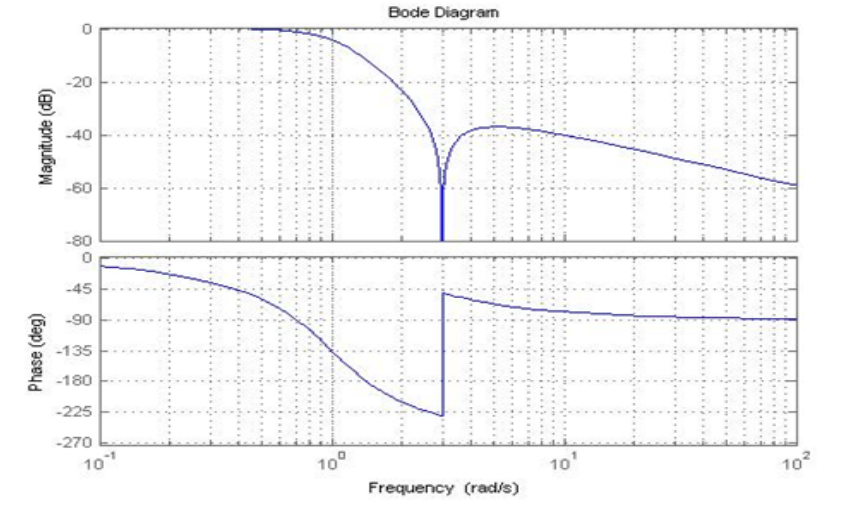

Observando el gráfico de la consigna se puede apreciar que el filtro pasabajo prototipo propuesto tiene un cero en 3 y 3 polos, para cumplir las pendientes de modulo deseadas, a fin de que la frecuencia de corte sea en $\omega=1$ el denominador debe ser de Butterworth:

$$T(s)=\frac{1}{9}\frac{s^2+9}{(s^2+s+1) \cdot (s+1)}$$

Para que la transferencia sea unitara para $\omega=0$

## Simulación numérica - Diagrama de polos y ceros

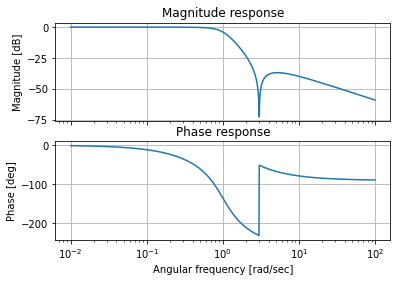

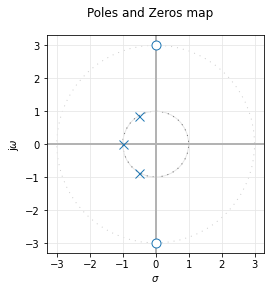

In [4]:
import scipy.signal as sig
import matplotlib as mpl
from splane import *

num=[1,0,9]
den=[1,1,1] 
num=np.multiply(1/9,num)
den=np.convolve(den,[1,1])
all_sys=(sig.TransferFunction(num,den))
filter_names=("Filtro prototipo")

fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, filter_names, 3, ())

## Prototipo pasa alto

Se reemplaza la s por 1/s


$$T(s)=\frac{1}{9}\frac{\frac{1}{s^2}+9}{(\frac{1}{s^2}+\frac{1}{s}+1) \cdot (\frac{1}{s}+1)}$$

simplificando queda:

$$T(s)=\frac{s(s^2+\frac{1}{9})}{(s^2+s+1)(s+1)}$$



## Simulación numérica - Diagrama de polos y ceros

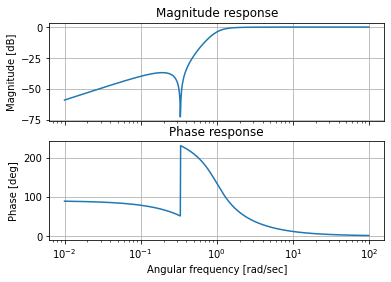

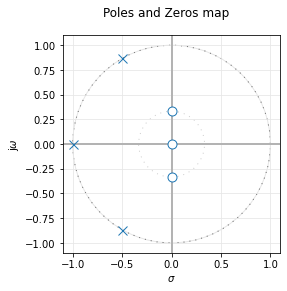

In [3]:
num=[1,0,1/9,0]
den=[1,1,1] 
den=np.convolve(den,[1,1])
all_sys=(sig.TransferFunction(num,den))
filter_names=("Filtro")

fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, filter_names, 3, ())

## Implementación

Se utilizará para la estructura de segundo orden el siguiente circuito:

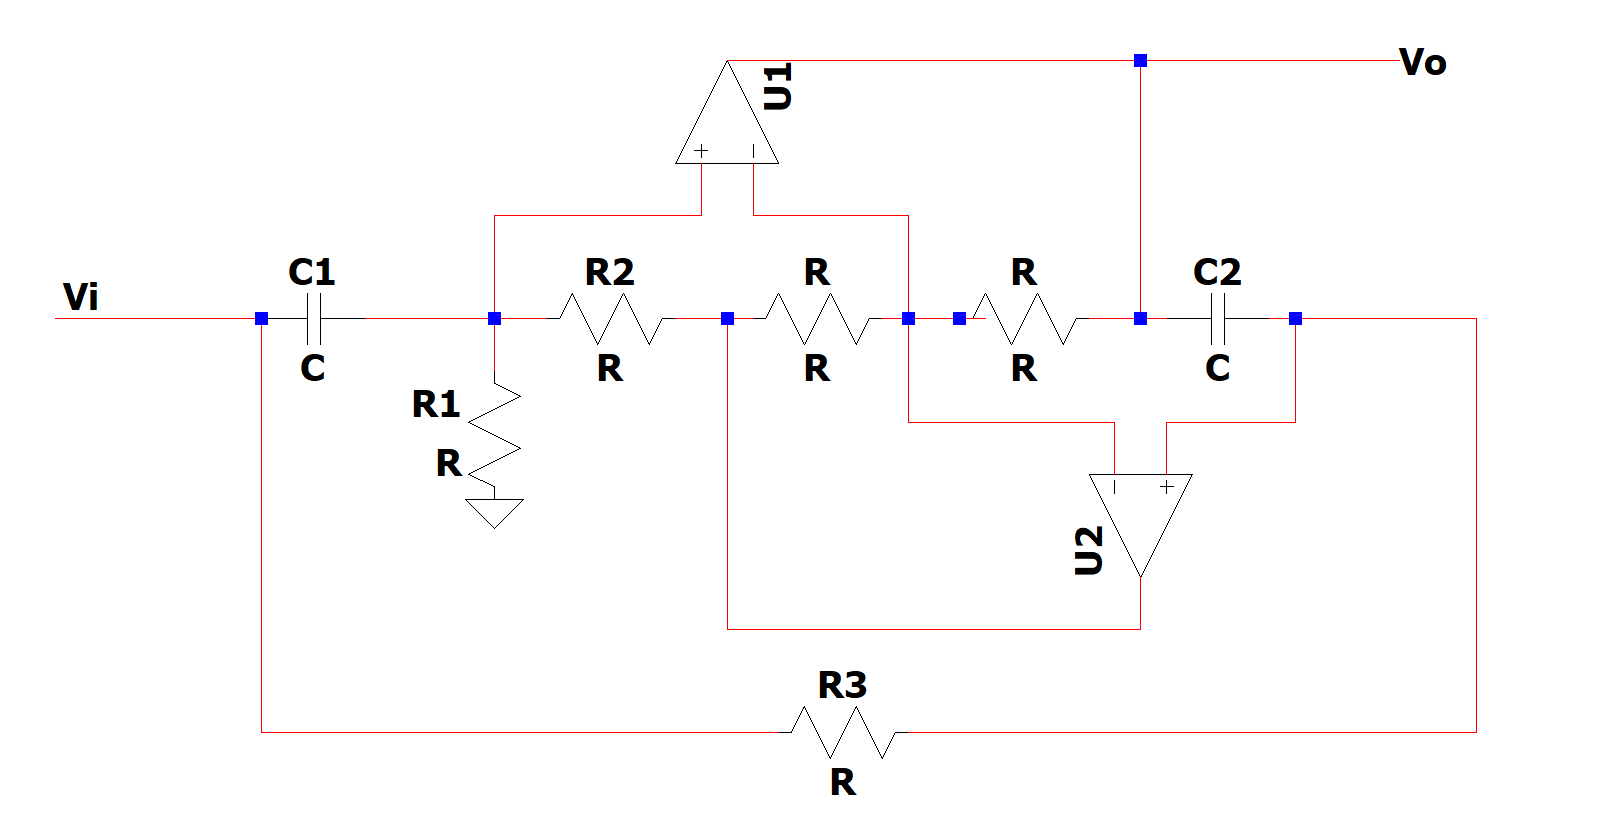

## Comparación entre la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:

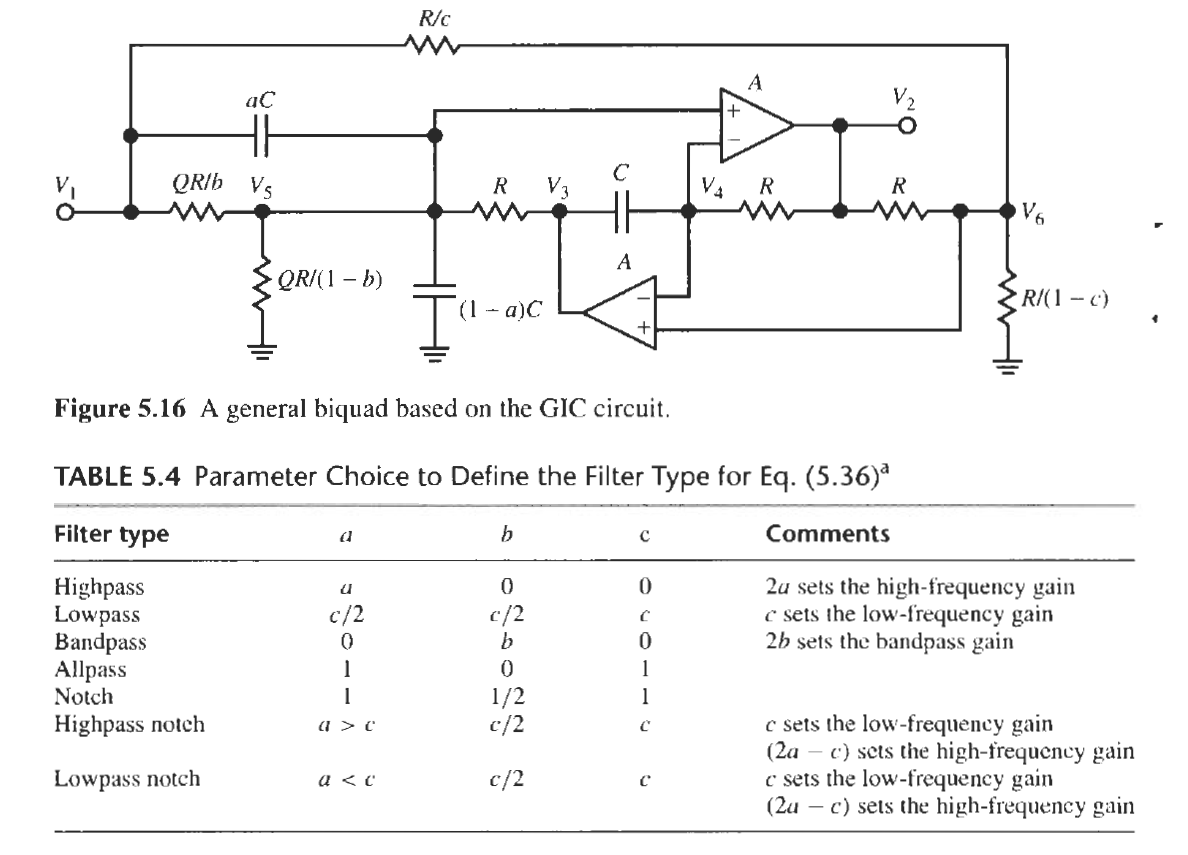

Quedando de esta manera el circuito:

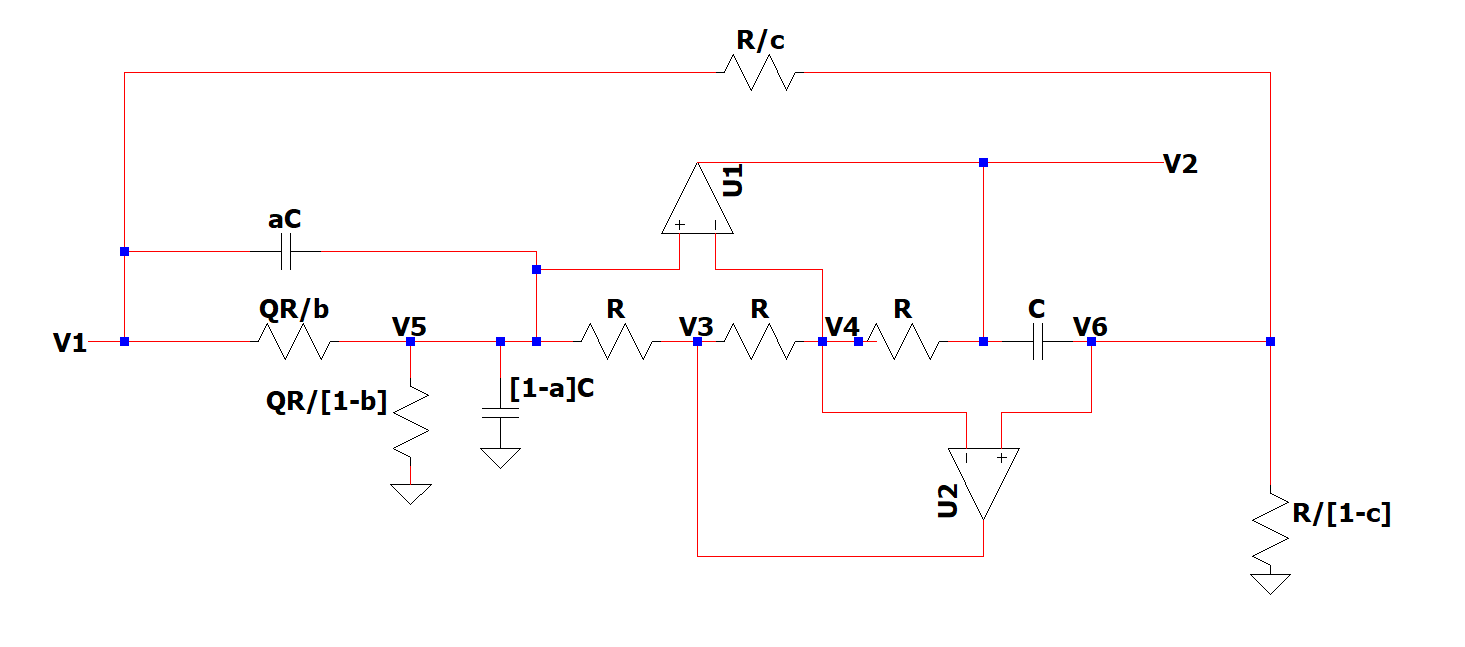

Si consideramos que los opamp ideales son ideales entonces:

$V_4=V_5=V_6$
Ahora 



## Análisis de nodos

### En $V_6$:

$(Gc+G(1-c)+SC)V_6=V_1Gc+V_2SC$

$(G+SC)V_6=V_1Gc+V_2SC$

### En $V_4$:

$2GV_4=V_2G+V_3G$

### En $V_5$:

$(\frac{Gb}{Q}+\frac{G(1-b)}{Q}+(1-a)SC+aSC+G)V_5=V_3G+V_1(\frac{Gb}{Q}+aSC)$

$(\frac{G}{Q}+SC+G)V_5=V_3G+V_1(\frac{Gb}{Q}+aSC)$


Si $\omega_0=\frac{G}{C}$ y recordando que *$V_4=V_5=V_6$* llevamos la expresión de $V_5$ y $V_6$ a $V_4$ queda:

$(\omega_0+S)V_4=\omega_0V_1c+V_2S$

$2V_4=V_2+V_3$

$(\frac{\omega_0}{Q}+S+\omega_0)V_4=V_3\omega_0+V_1(\frac{\omega_0b}{Q}+aS)$

$(\omega_0+\frac{\omega}{Q}+s)(\frac{V_2S+V_1\omega_0c}{s+\omega_0}=V_1(b\frac{\omega_0}{Q}+as)+(2V_4-V_2)\omega_0$

$\frac{V_2s}{s+\omega_0}(\omega_0+\frac{\omega_0}{Q}+s)+\frac{V_1\omega_0c}{s+\omega_0}(\omega_0+\frac{\omega_0}{Q}+s)=V_1(b\frac{\omega_0}{Q}+as)+2\omega_0(\frac{V_2s+V_1\omega_0c}{\omega_0+s)}-V_2\omega_0$

$V_2[s\omega_0+\frac{\omega_0}{Q}s+s^2-2\omega_0s+\omega_0s+\omega_0^2]=V_1[(s+\omega_0)(b\frac{\omega_0}{Q}+as)+2\omega_0^2c-\frac{\omega_0^2c}{Q}-\omega_0cs]$

$\frac{V_2}{V_1}=\frac{as^2+s[b\frac{\omega_0}{Q}+a\omega_0-\omega_0c]+\omega_0^2(\frac{b}{Q}+2c-c-\frac{c}{Q}}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}$

$$\frac{V_2}{V_1}=\frac{as^2+s\frac{\omega_0}{Q}[b+Q(a-c)]+\omega_0^2(c+\frac{1}{Q}(b-c))}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}$$


In [ ]:
Reemplazamos los valores:

- $a=1$
- $c=1$
- $b=0$



$$\frac{V_2}{V_1}=\frac{s^2+\omega_0^2(1-\frac{1}{Q})}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}$$

Se puede observar que con los valores de a,b y c definidos, y la ubicación del cero, tenemos el Q 

fijado en esta topología,. 

En este caso nos quedaria un Q de $\frac{9}{8}=1.125$ lo que nos daria un filtro que no cumpliria con la especificación de frecuencia de corte por lo tanto, no podemos utilizar este analisis, entonces vamos un caso donde el valor de G sea distinto.

$$T(s)=\frac{s^2+\frac{G_2G_3}{C^2}-\frac{G_3G_1}{C^2}}{s^2+s\frac{G_1}{C}+\frac{G_2G_3}{C^2}}$$

Si se adopta que $C=1$, entonces para obtener $\omega_0=1$

$G_2=\frac{1}{G_3}$

y como $G_3G_1=\frac{8}{9}$ y $G_1=1$

$G_3=\frac{8}{9}=0,88$

$G_2=1,125$


## Simulación

### Circuito de la red normalizada:

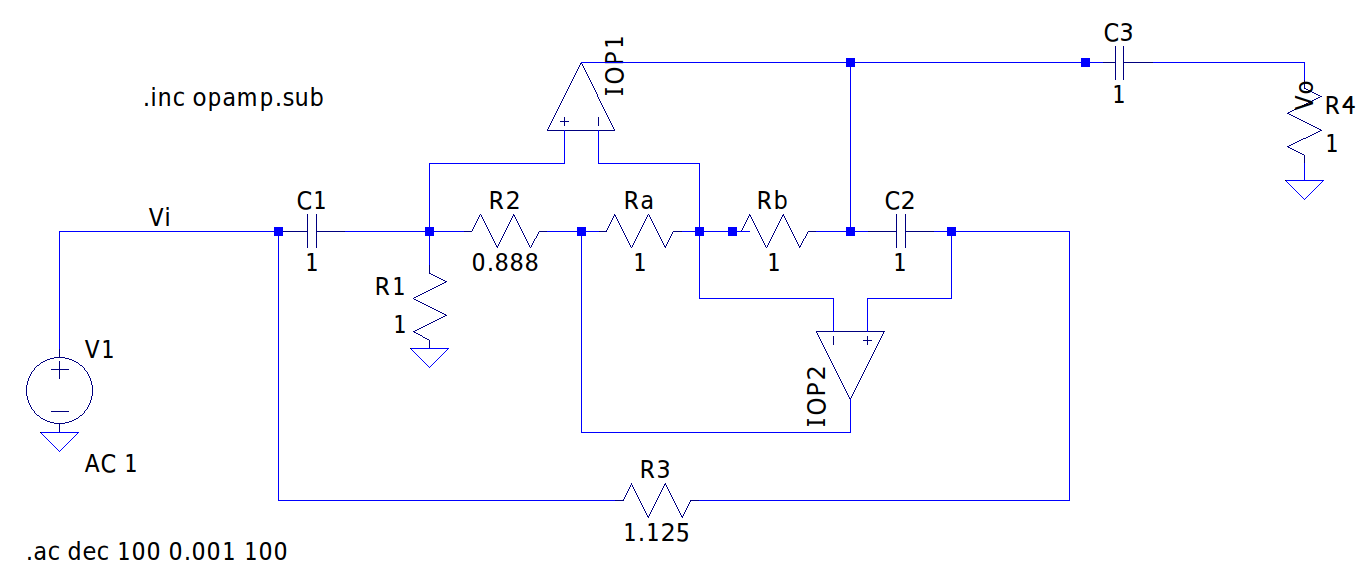

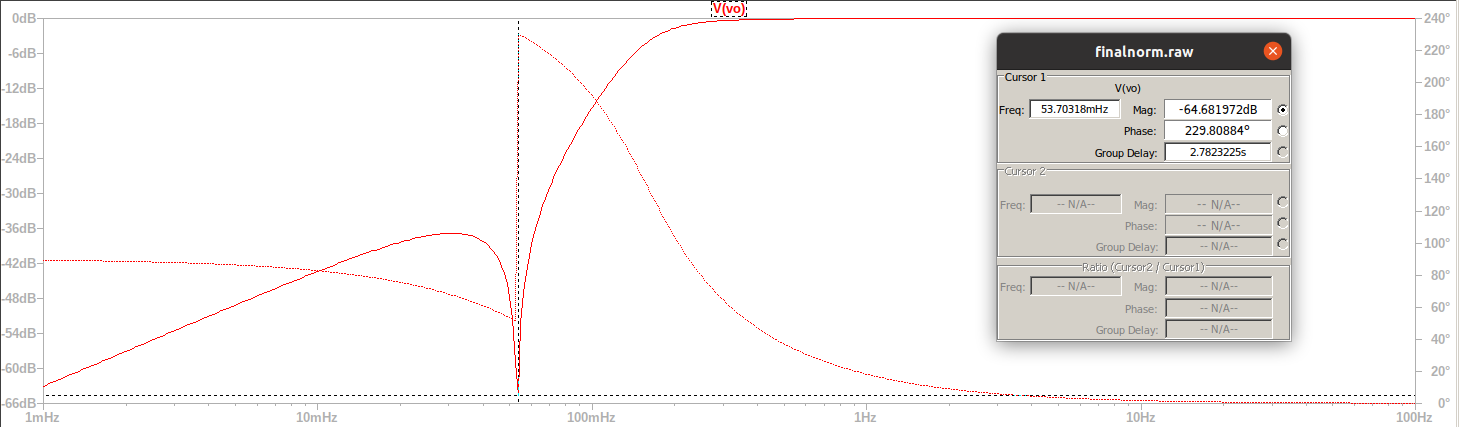


Se desnormaliza todo para R=10K y frecuencia $300Hz$ (enunciado)

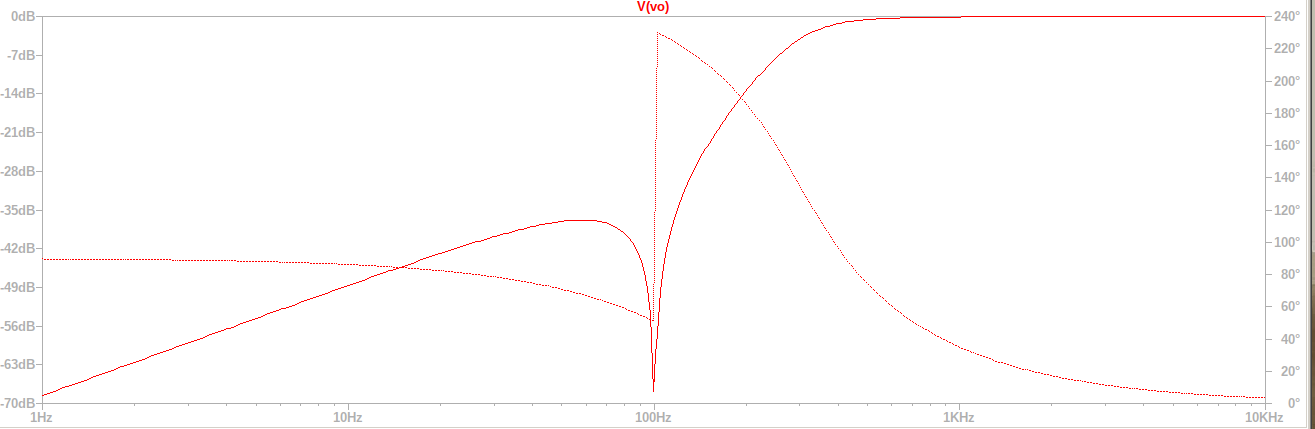